## Time Series
- Components
    - Trend
    - Seasonality
    - Cycle
    - Irregular components
- Moving Average
- Stationarity

#### Examples of time series
- Stock Prices
- Weather data (temperature, humidity, etc..)
- Visitor to a webpage, Youtube views
- Power generation

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
### Pandas Datetime index
pd.date_range("24/11/2020", periods=20, freq="D")

DatetimeIndex(['2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13'],
              dtype='datetime64[ns]', freq='D')

In [18]:
lst = ["13/06/1975", "6/09/1975", "20/12/1975"]
pd.to_datetime(lst)

DatetimeIndex(['1975-06-13', '1975-06-09', '1975-12-20'], dtype='datetime64[ns]', freq=None)

In [19]:
pd.date_range("24/11/2020", "24/12/2020", freq="D")

DatetimeIndex(['2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13',
               '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df = pd.DataFrame()
df["date"] = pd.date_range("24/11/2020", "24/12/2020", freq="D")

In [27]:
df.index = df["date"]

In [30]:
df["values"] = np.random.randint(500, 3000, 31)

In [33]:
df = df.drop(columns="date")
df.head()

,values
date,
2020-11-24,1158
2020-11-25,1871
2020-11-26,1860
2020-11-27,2983
2020-11-28,1071


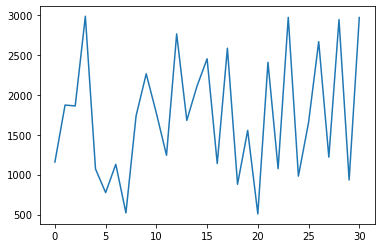

In [35]:
plt.plot(df.values)

In [38]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
    parse_dates=['date'], index_col="date")

In [44]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


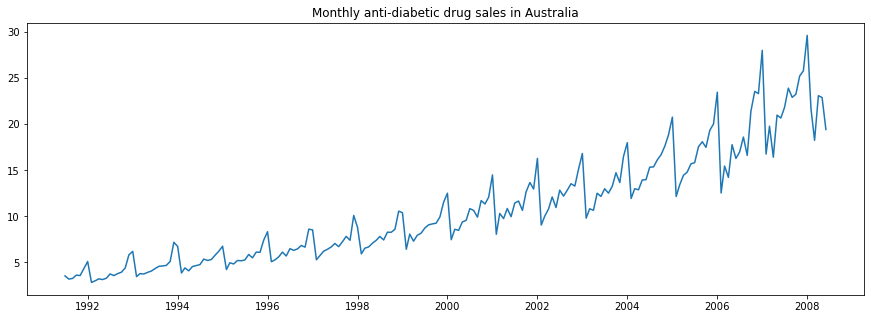

In [46]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.title("Monthly anti-diabetic drug sales in Australia");

#### Resampling

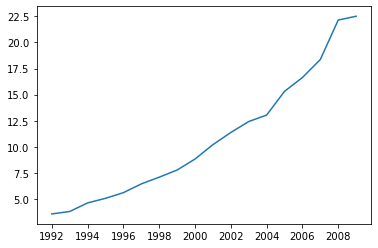

In [61]:
plt.plot(df.resample(rule="A").mean());

### Moving Average

In [62]:
mean = df.value.mean()

In [63]:
mean

10.694429582156861

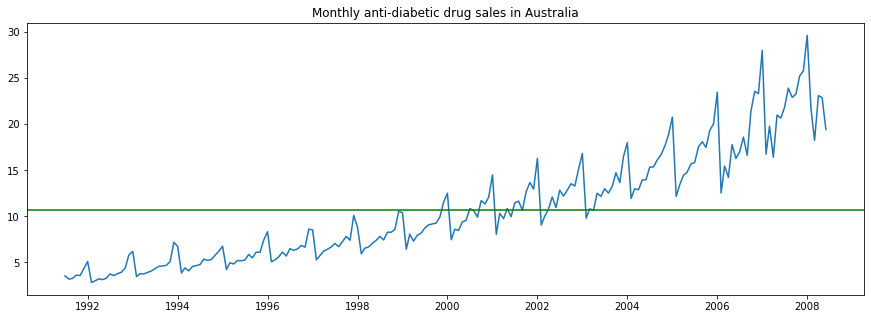

In [65]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.axhline(mean, c="g")
plt.title("Monthly anti-diabetic drug sales in Australia");

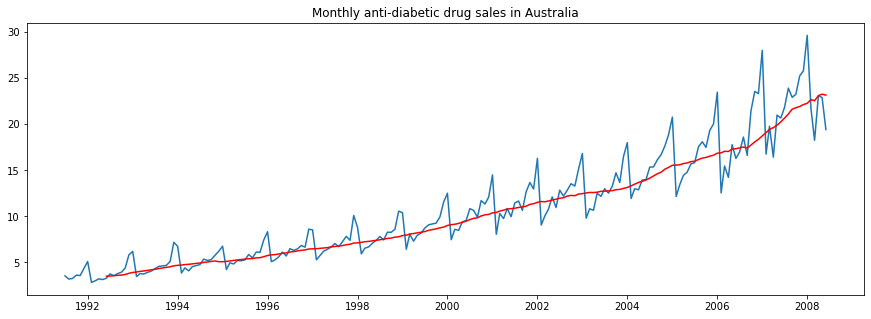

In [79]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.rolling(window=12).mean(), c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

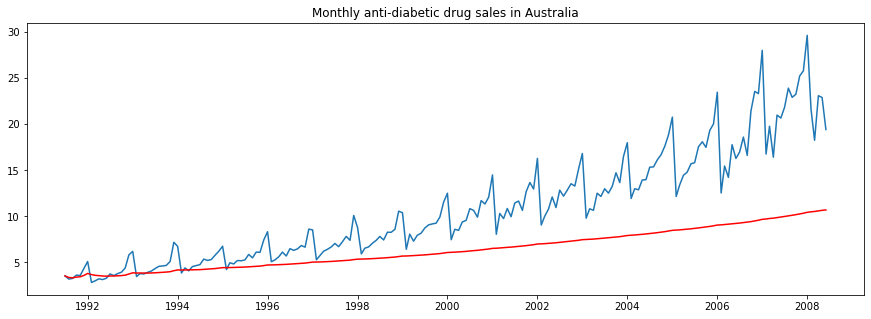

In [82]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.expanding().mean(), c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");


### Trend
    How the average changes through time

### Seasonality
    Repetitive pattern of peaks and droughts with a regular interval
    Usually relates to an interval of the calendar

![](https://assets.datacamp.com/production/repositories/684/datasets/9013c4b95cae33e4c24cfab6f3e9760f26e40351/ch1_vid2_aus_brick.png)

### Cycles
    Patterns repeated in uneven intervals or that do not relate to a period of the calendar.
    In general, they have a longer interval thgan seasons, and a larger amplitude of variation.

### Stationarity
- Mean is constant over time (there is no trend)
- Variance is constant

#### Weakly stationary
- No trend
- Variance is not constant

![](https://camo.githubusercontent.com/6dcf9f6bee43329d85fec2843c42c2df6e9a1e42/68747470733a2f2f7777772e6d616368696e656c6561726e696e67706c75732e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031392f30322f73746174696f6e6172792d616e642d6e6f6e2d73746174696f6e6172792d74696d652d7365726965732e706e67)

In [95]:
res = seasonal_decompose(df.value, model="additive")

<Figure size 1080x504 with 0 Axes>

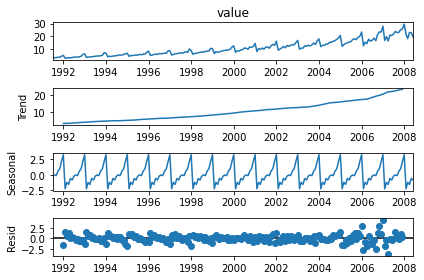

In [96]:
plt.figure(figsize=(15,7))
res.plot();

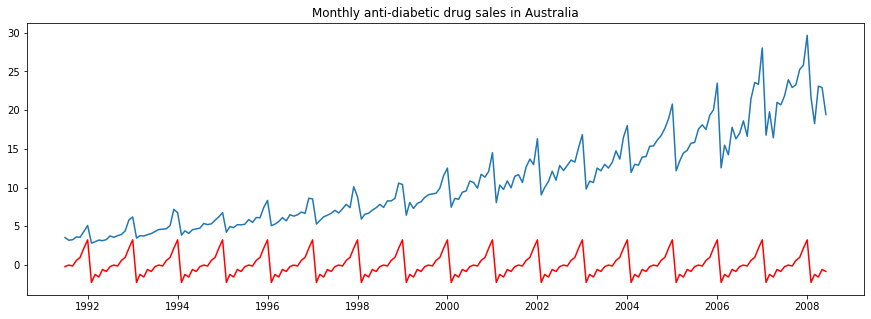

In [99]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(res.seasonal, c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

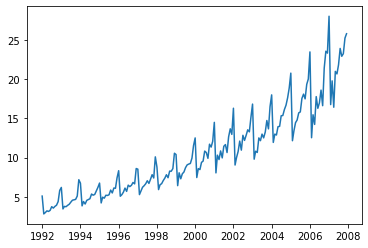

In [106]:
plt.plot(res.seasonal+res.resid+res.trend)



In [114]:
# Linear regression
from sklearn.linear_model import LinearRegression

In [124]:
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [158]:
df.index.astype(int)[0]

678326400000000000

In [127]:
df.index[8]-df.index[0]

Timedelta('244 days 00:00:00')

In [140]:
X = (df.index-df.index[0]).days
X

Int64Index([   0,   31,   62,   92,  123,  153,  184,  215,  244,  275,
            ...
            5906, 5936, 5967, 5997, 6028, 6059, 6088, 6119, 6149, 6180],
           dtype='int64', name='date', length=204)

In [141]:
lr = LinearRegression()
lr.fit(X.to_frame(), df.value)

LinearRegression()

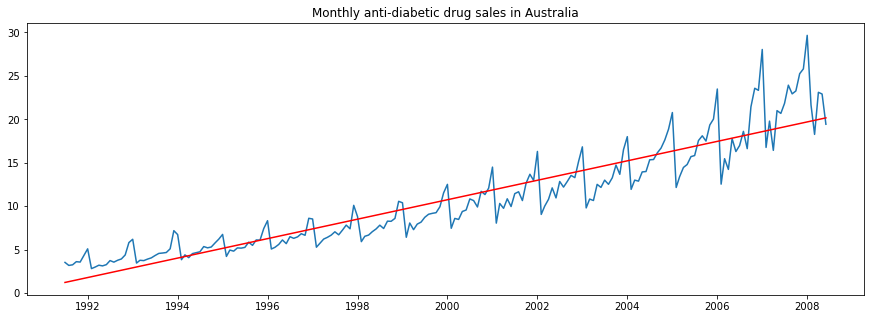

In [143]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.index,lr.predict(X.to_frame()),c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

In [155]:
df2 = pd.DataFrame({"ind":X, "value":res.trend}, index=df.index)
df2 = df2.dropna()

In [156]:
lr2 = LinearRegression()
lr2.fit(df2["ind"].to_frame(), df2.value)
df2["y_pred"] = lr2.predict(df2["ind"].to_frame())

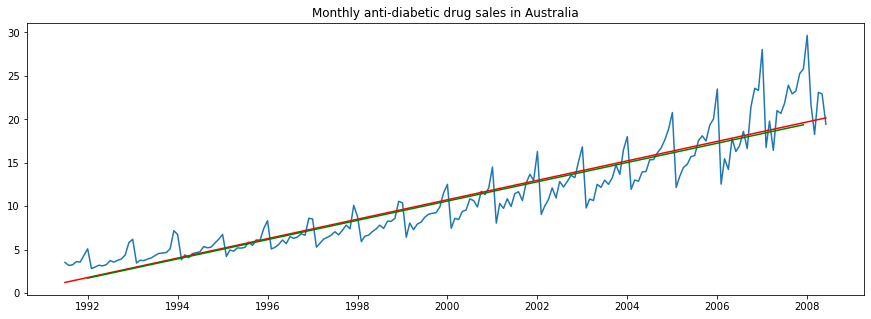

In [157]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.index,lr.predict(X.to_frame()),c="r")
plt.plot(df2.index,df2["y_pred"],c="g")
plt.title("Monthly anti-diabetic drug sales in Australia");

In [159]:
### Adding up waves

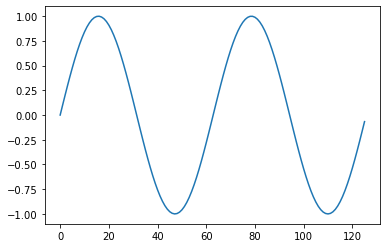

In [185]:
x = np.arange(0,4*np.pi,.1)
a = np.sin(x)
plt.plot(a)

In [186]:
b = -np.sin(x)

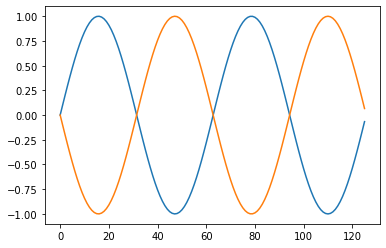

In [187]:
plt.plot(a)
plt.plot(b)

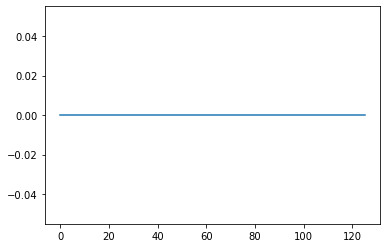

In [188]:
plt.plot(a+b)

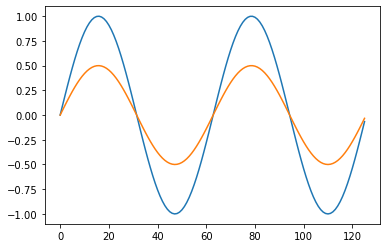

In [189]:
c = .5*np.sin(x)
plt.plot(a)
plt.plot(c)

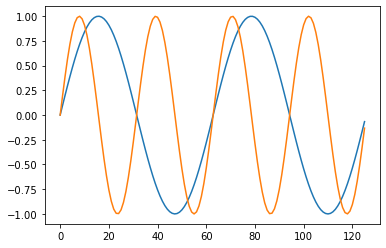

In [194]:
d = np.sin(x*2)
plt.plot(a)
plt.plot(d)

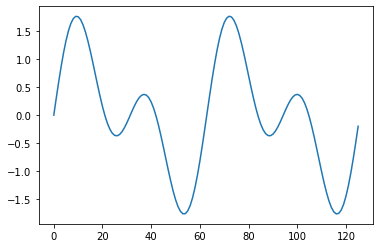

In [191]:
plt.plot(a+d)

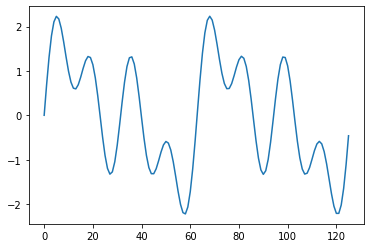

In [196]:
e = np.sin(x*4)
plt.plot(a+d+e)

In [212]:
from scipy.fft import fft, fftfreq, fftshift

In [221]:
ft = fft(a)
sp = fftshift(ft)
freq = fftshift(fftfreq(len(a)))
df = pd.DataFrame({"freq":freq,"value":sp.real})
df = df[df.value>0]
df

,freq,value
61,-0.015873,1.043825
65,0.015873,1.043825


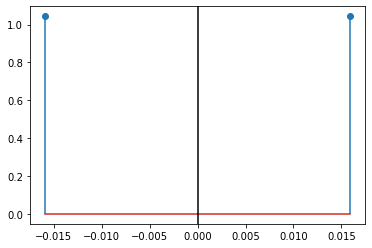

In [224]:
plt.stem(df.freq,df.value)
plt.axvline(0,c="k")

In [225]:
x = a+d

In [226]:
ft = fft(x)
sp = fftshift(ft)
freq = fftshift(fftfreq(len(a)))
df = pd.DataFrame({"freq":freq,"value":sp.real})
df = df[df.value>0]
df

,freq,value
59,-0.031746,2.068327
61,-0.015873,1.025230
65,0.015873,1.025230
67,0.031746,2.068327


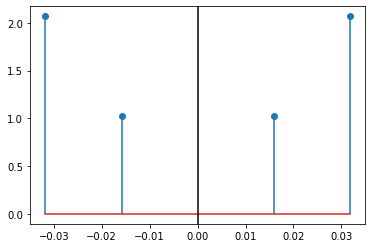

In [227]:
plt.stem(df.freq,df.value)
plt.axvline(0,c="k")

In [231]:
ft = fft(res.seasonal.values)
sp = fftshift(ft)
freq = fftshift(fftfreq(len(res.seasonal.values)))
df = pd.DataFrame({"freq":freq,"value":sp.real})
df = df[df.value>0]
df

,freq,value
0,-0.500000,6.793562e+01
1,-0.495098,2.289548e-15
2,-0.490196,3.276871e-15
3,-0.485294,1.747439e-15
4,-0.480392,1.973311e-15
...,...,...
199,0.475490,1.665579e-15
200,0.480392,1.973311e-15
201,0.485294,1.747439e-15
202,0.490196,3.276871e-15


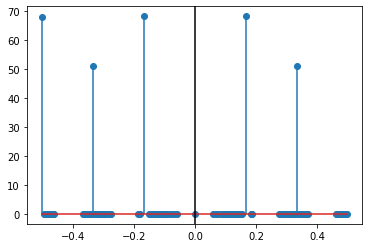

In [232]:
plt.stem(df.freq,df.value)
plt.axvline(0,c="k")

In [283]:
def fourier(x):
    ft = fft(x)
    sp = fftshift(ft)
    freq = fftshift(fftfreq(len(x)))
    df = pd.DataFrame({"freq":freq,"value":sp.real})
    df = df[df.value>0.5]
    return df

In [304]:
x = np.linspace(0,4*np.pi,1000)
sig = np.zeros(x.shape)
for f in [1,2,3,5,7,11/12,40]:
    sig += np.sin(x*f)

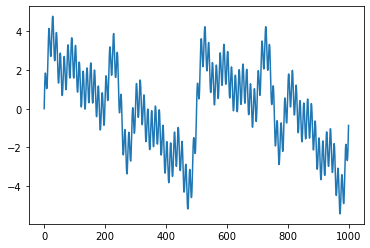

In [305]:
plt.plot(sig)

In [306]:
ft = fourier(sig)

<StemContainer object of 3 artists>

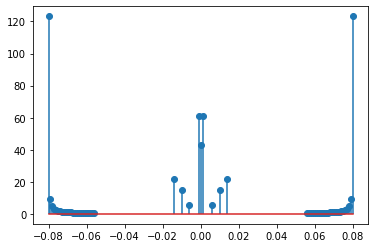

In [307]:
plt.stem(ft["freq"], ft["value"])

#### Filters
- low-pass
- high-pass
- band-pass

[Nyquist Frequency](https://en.wikipedia.org/wiki/Nyquist_frequency)

In [308]:
from scipy.signal import butter, lfilter


def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='low')
    return b, a


In [331]:
b,a = butter_lowpass(0.04, 1)

In [332]:
b

array([2.1396152e-05, 1.0698076e-04, 2.1396152e-04, 2.1396152e-04,
       1.0698076e-04, 2.1396152e-05])

In [333]:
a

array([ 1.        , -4.18730005,  7.06972275, -6.00995815,  2.5704293 ,
       -0.44220918])

In [334]:
sig_filt = lfilter(b, a, sig)

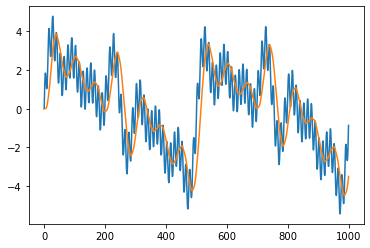

In [337]:
plt.plot(sig)
plt.plot(sig_filt)

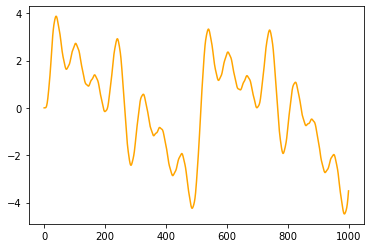

In [340]:
plt.plot(sig_filt, c="orange")

<StemContainer object of 3 artists>

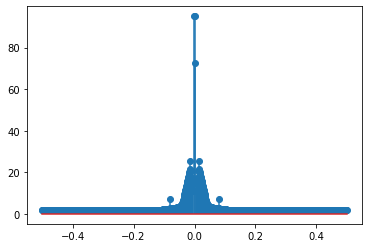

In [346]:
ft = fourier(sig_filt)
plt.stem(ft["freq"], ft["value"])